# Horses or Humans

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow_datasets as tfds

import itertools
from tqdm import tqdm

#import os
#import random

# Import Data with directory

Horses or Human

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-07-12 16:25:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  49.1MB/s    in 2.9s    

2021-07-12 16:25:53 (49.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-07-12 16:25:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 108.177.120.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

## Directory

In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
print(os.listdir('/tmp/horse-or-human'))

['horses', 'humans']


In [ ]:
print(os.listdir('/tmp/horse-or-human/humans'))

['human11-03.png', 'human10-30.png', 'human14-23.png', 'human09-23.png', 'human10-06.png', 'human02-07.png', 'human02-20.png', 'human11-30.png', 'human17-13.png', 'human01-24.png', 'human16-20.png', 'human06-23.png', 'human01-25.png', 'human15-21.png', 'human02-23.png', 'human03-18.png', 'human08-10.png', 'human08-00.png', 'human03-29.png', 'human15-05.png', 'human08-04.png', 'human16-07.png', 'human01-07.png', 'human07-21.png', 'human17-17.png', 'human15-14.png', 'human11-10.png', 'human09-05.png', 'human15-17.png', 'human06-10.png', 'human10-10.png', 'human09-03.png', 'human01-29.png', 'human02-01.png', 'human03-30.png', 'human03-24.png', 'human09-02.png', 'human01-14.png', 'human06-00.png', 'human14-07.png', 'human12-29.png', 'human05-18.png', 'human02-12.png', 'human13-22.png', 'human10-26.png', 'human03-07.png', 'human15-00.png', 'human04-09.png', 'human13-12.png', 'human12-07.png', 'human06-18.png', 'human04-16.png', 'human13-21.png', 'human15-06.png', 'human02-03.png', 'human16-

In [ ]:
os.path.join('/tmp/horse-or-human', 'horses')

'/tmp/horse-or-human/horses'

In [ ]:
train_dir = '/tmp/horse-or-human'
validation_dir = '/tmp/validation-horse-or-human'


train_human_dir = os.path.join(train_dir, 'humans')
train_horse_dir = os.path.join(train_dir, 'horses')

validation_human_dir = os.path.join(validation_dir, 'humans')
validation_horse_dir = os.path.join(validation_dir, 'horses')

In [ ]:
print('The number of images of human in traning set:',len(os.listdir(train_human_dir)))
print('The number of images of horse in traning set:',len(os.listdir(train_horse_dir)))

print('The number of images of human in validation set:',len(os.listdir(validation_human_dir)))
print('The number of images of horse in validation set:',len(os.listdir(validation_horse_dir)))

The number of images of human in traning set: 527
The number of images of horse in traning set: 500
The number of images of human in validation set: 128
The number of images of horse in validation set: 128


In [ ]:
before_tr_human = len(os.listdir(train_human_dir))
before_tr_horse = len(os.listdir(train_horse_dir))
before_vl_human = len(os.listdir(validation_human_dir))
before_vl_horse = len(os.listdir(validation_horse_dir))

## Show Random Images

In [ ]:
import matplotlib.image as mpimg

In [ ]:
def random_image(num = 2):

  fig, ax = plt.subplots(2,num, figsize = (10 + 2*num,10))
  fig.suptitle("Random Human or Horse")
  
  # Human Pictures
  human_random_index = np.random.randint(0, len(train_human_dir), size = num)
  for i,p in enumerate(human_random_index):
    
    human_pic = os.listdir(train_human_dir)[p]
    human_img = mpimg.imread(os.path.join(train_human_dir, human_pic))

    ax[0,i].axis('Off')
    ax[0,i].imshow(human_img)
    ax[0,i].title.set_text("Human_{}".format(i+1))

  # Horse Pictures
  horse_random_index = np.random.randint(0, len(train_horse_dir), size = num)
  for i,p in enumerate(horse_random_index):
    
    horse_pic = os.listdir(train_horse_dir)[p]
    horse_img = mpimg.imread(os.path.join(train_horse_dir, horse_pic))

    ax[1,i].axis('Off')
    ax[1,i].imshow(horse_img)
    ax[1,i].title.set_text("Horse_{}".format(i+1))

  plt.show()

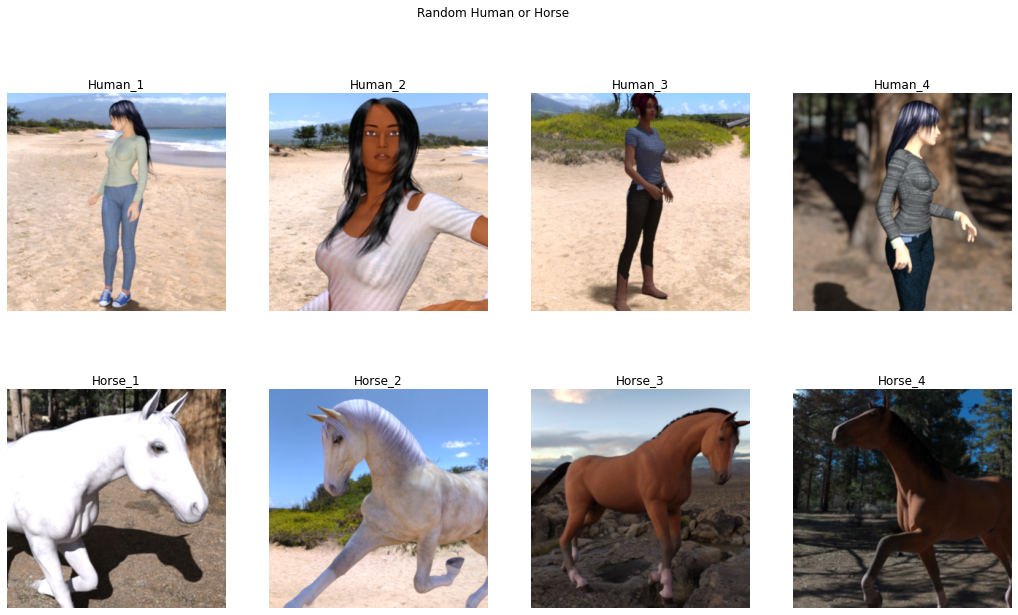

In [ ]:
random_image(num = 4)

# Preprocessing

## Augmentation

There are about 1000 images for our models. For that reason, it makes sense to increase the number of our examples. We can do this with Augmentataion

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def augmentation_train():

  train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
  

# batch_size = 1 for save_augmented_images step

  train_generator = train_datagen.flow_from_directory(train_dir,
                                                      batch_size = 1,
                                                      target_size = (150,150),
                                                      class_mode = 'binary',
                                                      shuffle = True)


  
  return train_generator

In [ ]:
def augmentation_valid():

  validation_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
    
    
  validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                     batch_size = 1,
                                                     target_size = (150,150),
                                                     class_mode = 'binary',
                                                     shuffle = True)
  
    
    
  return validation_generator

In [ ]:
train_generator = augmentation_train()

Found 1027 images belonging to 2 classes.


In [ ]:
validation_generator = augmentation_valid()

Found 256 images belonging to 2 classes.


### Save augmented images

In [ ]:
from keras.preprocessing.image import array_to_img

In [ ]:
def save_augmented_images_train():

  for i in range(len(os.listdir(train_horse_dir)) + len(os.listdir(train_human_dir))):

    img,lab = train_generator.next()

    #img has a shape of (1,300,300,3) due to the augmentation step from ImageDataGenerator. We need to adjust to save it as png file.
    img = img.reshape(150,150,3)

    if lab == 0: # to the horse directory
      image = array_to_img(img)
      image.save(train_horse_dir + "/horse_aug_{}.png".format(i))

    else: # to the human directory
      image = array_to_img(img)
      image.save(train_human_dir + "/human_aug_{}.png".format(i))

In [ ]:
def save_augmented_images_validation():

  for i in range(len(os.listdir(validation_horse_dir)) + len(os.listdir(validation_horse_dir))):

    img,lab = validation_generator.next()

    img = img.reshape(150,150,3)

    if lab == 0: # to the horse directory
      image = array_to_img(img)
      image.save(validation_horse_dir + "/horse_aug_{}.png".format(i))

    else: # to the human directory
      image = array_to_img(img)
      image.save(validation_human_dir + "/human_aug_{}.png".format(i))

In [ ]:
save_augmented_images_train()
save_augmented_images_validation()

In [ ]:
# befor Augmentation

print('The number of images of horse in training set:',before_tr_human,'before augmentation')
print('The number of images of human in training set:',before_tr_horse,'before augmentation')

print('The number of images of horse in validation set:',before_vl_human,'before augmentation')
print('The number of images of human in validation set:',before_vl_horse,'before augmentation')

The number of images of horse in training set: 527 before augmentation
The number of images of human in training set: 500 before augmentation
The number of images of horse in validation set: 128 before augmentation
The number of images of human in validation set: 128 before augmentation


In [ ]:
# after Augmentataion

print('The number of images of horse in training set:',len(os.listdir(train_human_dir)),'after augmentation')
print('The number of images of human in training set:',len(os.listdir(train_horse_dir)),'after augmentation')

print('The number of images of horse in validation set:',len(os.listdir(validation_human_dir)),'after augmentation')
print('The number of images of human in validation set:',len(os.listdir(validation_horse_dir)),'after augmentation')

The number of images of horse in training set: 1054 after augmentation
The number of images of human in training set: 1000 after augmentation
The number of images of horse in validation set: 256 after augmentation
The number of images of human in validation set: 256 after augmentation


In [ ]:
#aug_pic_horse = mpimg.imread(os.path.join(train_horse_dir,"horse_aug_1005.png"))
#plt.imshow(aug_pic_horse)

## Rescale and Batch

In [ ]:
def rescale_batch():

  train_datagen = ImageDataGenerator(rescale=1./255)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(train_dir,
                                                      batch_size = 8,
                                                      target_size = (150,150),
                                                      class_mode = 'binary',
                                                      shuffle = True)
  validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                      batch_size = 8,
                                                      target_size = (150,150),
                                                      class_mode = 'binary',
                                                      shuffle = True)
  
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = rescale_batch()

Found 2054 images belonging to 2 classes.
Found 512 images belonging to 2 classes.


# 1. Transfer Learning

In this step, we will borrow a pre-trained model to compare the result of the **transfer learning** with **MobilNet** to the costumized model.

It is normal that the performance of MobilNet is better than the customized model. Because MobilNet is trained with more than a million examples and our customized model have only 2564 images for training and validation

## MobilNet

In [ ]:
mobil_model = tf.keras.applications.MobileNetV2(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
    )

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in mobil_model.layers:
    layer.trainable = False

In [ ]:
#mobil_model.summary()

In [ ]:
selected_layer = mobil_model.get_layer("Conv_1_bn")
print('last layer output shape: ', selected_layer.output_shape)
selected_output = selected_layer.output

last layer output shape:  (None, 5, 5, 1280)


In [ ]:
x = tf.keras.layers.Flatten()(selected_output)
x = tf.keras.layers.Dense(1024, activation = "relu")(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)           
x = tf.keras.layers.Dense(1, activation = "sigmoid")(x)           

mobilnet_model = tf.keras.Model(mobil_model.input, x) 
mobilnet_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), 
              loss = "binary_crossentropy", 
              metrics = ["acc"])

#mobilnet_model.summary()

In [ ]:
history_mobil = mobilnet_model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 5,
    verbose = 1)

Epoch 1/5
257/257 [==============================] - 123s 465ms/step - loss: 0.8075 - acc: 0.9630 - val_loss: 1.1121 - val_acc: 0.9551
Epoch 2/5
257/257 [==============================] - 115s 447ms/step - loss: 0.1320 - acc: 0.9917 - val_loss: 0.3307 - val_acc: 0.9883
Epoch 3/5
257/257 [==============================] - 120s 467ms/step - loss: 0.0945 - acc: 0.9951 - val_loss: 0.1165 - val_acc: 0.9922
Epoch 4/5
257/257 [==============================] - 116s 451ms/step - loss: 0.0497 - acc: 0.9985 - val_loss: 0.2555 - val_acc: 0.9922
Epoch 5/5
257/257 [==============================] - 119s 465ms/step - loss: 1.7936e-11 - acc: 1.0000 - val_loss: 0.2728 - val_acc: 0.9902


***

# 2. My Model

## My Simple Model

This Step ''My Simple Model'' is just for checking how well the simple model performs. And Later, I will adjust this model for my custom model(Final Model)

In [ ]:
class Simple_Model(tf.keras.Model):

  def __init__(self):
    super(Simple_Model, self).__init__() 

    self.conv1 = tf.keras.layers.Conv2D(128, 3, padding = 'same', activation='relu')
    self.pool1 = tf.keras.layers.AveragePooling2D((3,3),padding='valid')
    self.bn1 = tf.keras.layers.BatchNormalization()

    self.conv2 = tf.keras.layers.Conv2D(64, 3, padding = 'same', activation='relu')
    self.pool2 = tf.keras.layers.AveragePooling2D((3,3),padding='valid')
    self.bn2 = tf.keras.layers.BatchNormalization()

    self.conv3 = tf.keras.layers.Conv2D(32, 3, padding = 'same', activation='relu')
    self.pool3 = tf.keras.layers.AveragePooling2D((3,3),padding='valid')
    self.bn3 = tf.keras.layers.BatchNormalization()

    self.flatten = tf.keras.layers.Flatten()
    self.classifier = tf.keras.layers.Dense(1,activation = 'sigmoid')

  def call(self, inputs):

    x = self.conv1(inputs)
    x = self.pool1(x)
    x = self.bn1(x)

    x = self.conv2(x)
    x = self.pool2(x)
    x = self.bn2(x)

    x = self.conv3(x)
    x = self.pool3(x)
    x = self.bn3(x)

    x = self.flatten(x)

    return self.classifier(x)

In [ ]:
simple_model = Simple_Model()

In [ ]:
#inputs = Input(shape=(150,150,3)) # Provide the shape you wish to provide, with respect to 'your model class' expectation
#model_simple = Model(inputs=[inputs],outputs=simple_model.call(inputs))

#model_simple.summary() # This will print the summary properly
#plot_model(model_simple,show_shapes=True)

In [ ]:
simple_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), 
              loss = "binary_crossentropy", 
              metrics = ["acc"])

In [ ]:
history_simple = simple_model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 3,
    verbose = 1)

Epoch 1/3
257/257 [==============================] - 133s 511ms/step - loss: 0.3655 - acc: 0.8315 - val_loss: 1.0408 - val_acc: 0.5000
Epoch 2/3
257/257 [==============================] - 131s 511ms/step - loss: 0.1934 - acc: 0.9294 - val_loss: 1.3375 - val_acc: 0.5137
Epoch 3/3
257/257 [==============================] - 131s 510ms/step - loss: 0.1405 - acc: 0.9474 - val_loss: 0.5831 - val_acc: 0.6895


## My Residual Model

I will put a residual block into my final custom model. To check in advance if the residual block works well, I will make a simple residual model in this step.

In [ ]:
class my_IdentityBlock(tf.keras.Model):

  def __init__(self, filters, kernel_size):
    super(my_IdentityBlock, self).__init__()

    self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding = 'same')
    self.bn1 = tf.keras.layers.BatchNormalization()
    self.act1 = tf.keras.layers.Activation('relu')

    self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding = 'same')
    self.bn2 = tf.keras.layers.BatchNormalization()

    
    self.add = tf.keras.layers.Add()
    self.act2 = tf.keras.layers.Activation('relu')


  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.bn1(x)
    x = self.act1(x)

    x = self.conv2(x)
    x = self.bn2(x)

    x = self.add([x, inputs]) # at this moment, x must have the same dimenstion as input_tnesor to concatenate those, for this reason it is called Identity Block: # bring information from input layer.
    x = self.act2(x)

    return x

In [ ]:
class my_ResNet(tf.keras.Model):
    def __init__(self):
        super(my_ResNet, self).__init__()

        self.input_start = tf.keras.layers.Input(shape = (150,150,3))
        self.conv1 = tf.keras.layers.Conv2D(64, 7, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.act1 = tf.keras.layers.Activation('relu')
        self.max_pool = tf.keras.layers.MaxPool2D((3, 3))

        # Use the Identity blocks
        self.id1a = my_IdentityBlock(64, 3)
        self.id1b = my_IdentityBlock(64, 3)
        
        self.conv2 = tf.keras.layers.Conv2D(32, 3, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.act2 = tf.keras.layers.Activation('relu')

        self.id1c = my_IdentityBlock(32, 3)

        self.conv3 = tf.keras.layers.Conv2D(32, 3, padding='same')
        self.bn3 = tf.keras.layers.BatchNormalization()
        self.act3 = tf.keras.layers.Activation('relu')
        self.pool3 = tf.keras.layers.AveragePooling2D((3,3))

        self.conv4 = tf.keras.layers.Conv2D(32, 3, padding='same')
        self.bn4 = tf.keras.layers.BatchNormalization()
        self.act4 = tf.keras.layers.Activation('relu')
        self.pool4 = tf.keras.layers.AveragePooling2D((3,3))

        #self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.flatten = tf.keras.layers.Flatten()
        self.ds1 = tf.keras.layers.Dense(128, activation = 'relu')
        self.ds2 = tf.keras.layers.Dense(128, activation = 'relu')

        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.max_pool(x)

        # insert the identity blocks in the middle of the network
        x = self.id1a(x)
        x = self.id1b(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)

        x = self.id1c(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.act3(x)

        x = self.conv4(x)
        x = self.bn4(x)
        x = self.act4(x)

       # x = self.global_pool(x)
        x = self.flatten(x)
        x = self.ds1(x)
        x = self.ds2(x)

        return self.classifier(x)

In [ ]:
my_resnet = my_ResNet()

In [ ]:
#inputs = Input(shape=(150,150,3)) # Provide the shape you wish to provide, with respect to 'your model class' expectation
#model_resnet = Model(inputs=[inputs],outputs=my_resnet.call(inputs))
#model_resnet.summary() # This will print the summary properly
#plot_model(my_resnet,show_shapes=True) # This will give you the visualization of the model.

In [ ]:
#inputs = Input(shape=(150,150,64)) # Provide the shape you wish to provide, with respect to 'your model class' expectation
#model_ID = Model(inputs=[inputs],outputs=my_IdentityBlock(64,3).call(inputs))
#plot_model(model_ID,show_shapes=True) 

In [ ]:
my_resnet.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), 
              loss = "binary_crossentropy", 
              metrics = ["acc"])

history_simple = my_resnet.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 3,
    verbose = 1)

Epoch 1/3
257/257 [==============================] - 366s 1s/step - loss: 0.4342 - acc: 0.8389 - val_loss: 3.1969 - val_acc: 0.5000
Epoch 2/3
257/257 [==============================] - 363s 1s/step - loss: 0.1707 - acc: 0.9426 - val_loss: 1.6682 - val_acc: 0.6445
Epoch 3/3
257/257 [==============================] - 365s 1s/step - loss: 0.1018 - acc: 0.9669 - val_loss: 5.2773 - val_acc: 0.5859


# 3. Custom My Model

To-do List </br>
</br>

1. customize **Loss Function**
2. customize **Activation Function**
3. customize **Dense layers**
4. customize **early stop callbacks**
5. customize **Learning Rate with callbacks**
6. customize **Training Loop**

## Loss Function

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
#  class My_CrossEntropy(tf.keras.losses.Loss):

#    def __init__(self):
#      super(My_CrossEntropy,self).__init__()
  
#    @tf.function
#    def call(self, y_true, y_pred):

#      y_pred = y_pred + 1e-7

#      tmp1 = tf.multiply(y_true, tf.math.log(y_pred))
#      tmp2 = tf.multiply(1 - y_true, tf.math.log(1 - y_pred))

#      my_loss = -K.mean(tmp1 + tmp2)

#      return my_loss

## Activation Function (Relu)

In [ ]:
class My_Relu_Layer(tf.keras.layers.Layer):
  
  def __init__(self, hyper = 0):
    super(My_Relu_Layer, self).__init__()
    self.hyper = hyper

  @tf.function
  def my_relu(self, x):

    return K.maximum(tf.cast(self.hyper,tf.float32), x)

  # def get_config(self):
  #   config = super().get_config().copy()
  #   config.update({
  #       'hyper': self.hyper
  #   })
  #   return config


In [ ]:
@tf.function
def my_relu_function(x):
  return K.maximum(tf.cast(0,tf.float32), x)

## Dense Layers

### Simple Dense Layer

In [ ]:
class SimpleDense(tf.keras.layers.Layer):

    def __init__(self, units=32):
        super(SimpleDense, self).__init__()
        self.units = units
        
        self.activation = my_relu_function


    def build(self, input_shape):

        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'), trainable=True)
        
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'), trainable=True)
        
        super().build(input_shape)


    def call(self, inputs):
        
        return self.activation(tf.matmul(inputs, self.w) + self.b)

### Quadratic Dense Layer

Just for fun. I will not use this dense layer for my final model.

In [ ]:
# which does not make sense for image recognition but just for fun

class QuadraticDense(tf.keras.layers.Layer):

    def __init__(self, units=32):

        super(QuadraticDense, self).__init__()
        self.units = units
        self.activation = my_relu_function
    
    def build(self, input_shape):

        a_init = tf.random_normal_initializer()
        self.a = tf.Variable(name="kernel",
            initial_value=a_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'), trainable=True)
        
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(name="kernel",
            initial_value=b_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'), trainable=True)
        
        c_init = tf.zeros_initializer()
        self.c = tf.Variable(name="bias",
            initial_value=c_init(shape=(self.units,), dtype='float32'), trainable=True)
        
        super().build(input_shape)
   
    def call(self, inputs):
        return self.activation(tf.matmul(inputs**2, self.a) + tf.matmul(inputs, self.b) + self.c)

## Callbacks

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
#%load_ext tensorboard

In [ ]:
acc_threshold = 99.0
val_acc_threshold = 95.0

class myCallback(tf.keras.callbacks.Callback): 
  @tf.function
  def on_epoch_end(self, epoch, logs={}): 
    if((logs.get('accuracy') > acc_threshold) & (logs.get('val_accuracy') > val_acc_threshold)):    
      tf.print("Reached  val_accuracy, so stopping training!!".format(acc_threshold))
      self.model.stop_training = True

In [ ]:
#@tf.function
def step_decay(epoch):

  initial_lr = 0.001

  #tmp = tf.math.floor(epoch / 5)

  if epoch < 2:
    tmp = 0

  elif epoch < 7:
    tmp = 1

  else:
    tmp = 2

  learning_rate = initial_lr * (0.1**tmp)

  return learning_rate

In [ ]:
callbacks = [myCallback(), LearningRateScheduler(step_decay, verbose=1)]   #, TensorBoard(log_dir='./log_dir')] it requiers get_config

In [ ]:
# my_model = Model(inputs = input, outputs = output)

# Final Model

In [ ]:
class My_Custom_Model(tf.keras.Model):

  def __init__(self):
    super(My_Custom_Model, self).__init__() 

    self.conv1 = tf.keras.layers.Conv2D(128, 3, padding = 'same', activation='relu')
    self.pool1 = tf.keras.layers.AveragePooling2D((3,3),padding='valid')
    self.bn1 = tf.keras.layers.BatchNormalization()
    self.act1 = My_Relu_Layer()
    self.drop1 = tf.keras.layers.Dropout(0.1)

    self.id1a = my_IdentityBlock(128, 3)
    #self.id1b = my_IdentityBlock(128, 3)

    self.conv2 = tf.keras.layers.Conv2D(64, 3, padding = 'same', activation='relu')
    self.pool2 = tf.keras.layers.AveragePooling2D((3,3),padding='valid')
    self.bn2 = tf.keras.layers.BatchNormalization()
    self.act2 = My_Relu_Layer()
    self.drop2 = tf.keras.layers.Dropout(0.1)

    self.id2a = my_IdentityBlock(64, 3)
    #self.id2b = my_IdentityBlock(64, 3)

    self.conv3 = tf.keras.layers.Conv2D(32, 3, padding = 'same', activation='relu')
    self.pool3 = tf.keras.layers.AveragePooling2D((3,3),padding='valid')
    self.bn3 = tf.keras.layers.BatchNormalization()
    self.act3 = My_Relu_Layer()
    self.drop3 = tf.keras.layers.Dropout(0.1)

    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = SimpleDense(units = 1024)
    self.dense2 = SimpleDense(units = 1024)
    self.classifier = tf.keras.layers.Dense(1,activation = 'sigmoid')

  def call(self, inputs):

    x = self.conv1(inputs)
    x = self.pool1(x)
    x = self.bn1(x)
    x = self.act1(x)
    x = self.drop1(x)

    x = self.id1a(x)
    #x = self.id1b(x)

    x = self.conv2(x)
    x = self.pool2(x)
    x = self.bn2(x)
    x = self.act2(x)
    x = self.drop2(x)

    x = self.id2a(x)
    #x = self.id2b(x)

    x = self.conv3(x)
    x = self.pool3(x)
    x = self.bn3(x)
    x = self.act3(x)
    x = self.drop3(x)    

    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)

    return self.classifier(x)

In [ ]:
my_custom_model = My_Custom_Model()

In [ ]:
my_custom_model.compile(optimizer = tf.keras.optimizers.RMSprop(), 
              loss = "binary_crossentropy", 
              metrics = ["accuracy"])

In [ ]:
history_my_custom = my_custom_model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 15,
    callbacks = callbacks)

Epoch 1/15

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
257/257 [==============================] - 364s 1s/step - loss: 0.7135 - accuracy: 0.7980 - val_loss: 1.0771 - val_accuracy: 0.5469
Epoch 2/15

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
257/257 [==============================] - 359s 1s/step - loss: 0.3080 - accuracy: 0.9036 - val_loss: 6.9301 - val_accuracy: 0.5410
Epoch 3/15

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0001.
257/257 [==============================] - 362s 1s/step - loss: 0.0793 - accuracy: 0.9732 - val_loss: 3.9485 - val_accuracy: 0.6504
Epoch 4/15

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0001.
257/257 [==============================] - 364s 1s/step - loss: 0.0622 - accuracy: 0.9786 - val_loss: 4.9461 - val_accuracy: 0.6719
Epoch 5/15

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0001.
257/257 [==============================] - 361s 1s/step - loss: 0.029

***

As expected, the performance of my custom model is worse than the one of the transfer-learning model. It is because that the transfer-learning model has much more examples and a deeper structure. On the other hand, The custom model has just few examples and it is not enough to make a robust model for the binary classification. Furthemore, the custom model has **Overfitting** Problem: The accuracy from training step is over 99%, which is decent. However, The accuracy from validation set is around 70%.

# Reset

In [ ]:
# import os, signal

# os.kill(     os.getpid() , 
#          signal.SIGKILL
#        )